In [1]:
#calling dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, preprocessing

In [132]:
#converting into a pandas df
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
#initializing my shape to see what i'm working with
train_df.shape

(30471, 292)

In [4]:
#taking a look at the top of the dataset.  Lots of null values, however what may we need?
train_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [5]:
#listing out all of the column names to see what I may want to dweleve more into based on common knowledge
#with housing prices.
list(train_df)

['id',
 'timestamp',
 'full_sq',
 'life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'product_type',
 'sub_area',
 'area_m',
 'raion_popul',
 'green_zone_part',
 'indust_part',
 'children_preschool',
 'preschool_quota',
 'preschool_education_centers_raion',
 'children_school',
 'school_quota',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'hospital_beds_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'thermal_power_plant_raion',
 'incineration_raion',
 'oil_chemistry_raion',
 'radiation_raion',
 'railroad_terminal_raion',
 'big_market_raion',
 'nuclear_reactor_raion',
 'detention_facility_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'young_male',
 'young_female',
 'work_all',
 'work_male',
 'work_female',
 'ekder_all'

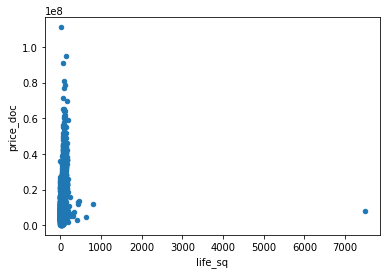

In [6]:
#Here I took 10 possible values in the code below this cell and plotted them to find a corrleation.
#Some negative correlations are actully good, as the closer an item is, the more in value
train_df.plot.scatter("life_sq", "price_doc")

In [7]:
#10 rows that show correlation to be used in a recreation dataset for Machcine Learning(Target Variable is price_doc). 
#full_sq **Highly correlated* *more sq m higher the price*
#num_room **Highly correlated* *more rooms higher the price*
#floor  *Lower the floor, higher the price**
#life_sq 
#state 
#school_km
#green_zone_km
#park_km
#kingergarten_km
#market_shop_km **highly correlated** closer much higher the price
#university_km **high corrleated** closer much higher the price

In [118]:
#creating a modified data set with the 10 values we found strongly correlated to Target Variable price_doc
modified_train = train_df[['id','timestamp','full_sq','life_sq','num_room','state','school_km','green_zone_km',\
 'park_km','kindergarten_km','market_shop_km','university_km','sub_area','price_doc',]]

In [119]:
#filling null values with bfill method in case of nan
complete_df = modified_train.fillna(method="bfill")

In [120]:
#renaming columns to be more readable
complete_df = complete_df.rename({"timestamp": "Date of Sale","id": "Transaction Id","full_sq": "Total Sq m","life_sq": "Livable Sq m",\
"num_room":"Number of Rooms","school_km":"Distance to School","price_doc":"Sale Price","university_km":"Distance to University",\
"sub_area":"District", "state":"Condition","green_zone_km":"Distance to Greenery","park_km":"Distance to Park",\
"kindergarten_km":"Distance to Kindergarten", "market_shop_km":"Distance to markets/shops"},axis='columns')

In [121]:
complete_df= complete_df.fillna(method="ffill")

In [122]:
district_gb = complete_df.groupby(["District"])
avg_price_per_district = district_gb["Sale Price"].mean()
for_plot = pd.DataFrame(avg_price_per_district)
for_plot = for_plot.reset_index()

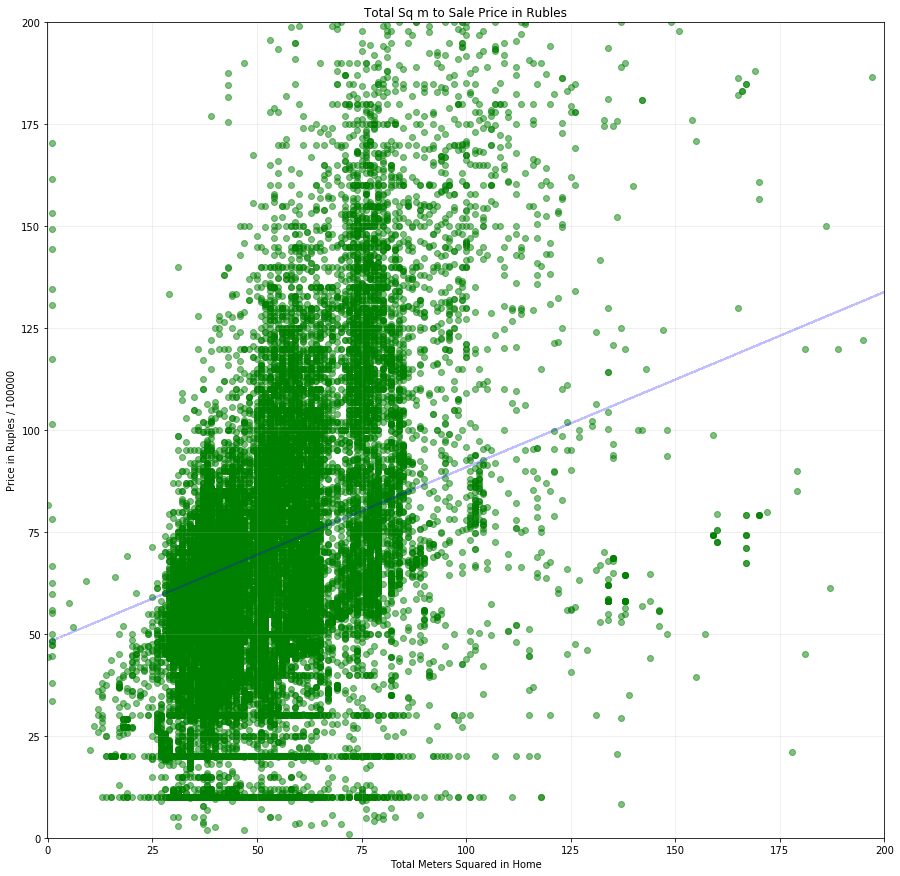

<Figure size 432x288 with 0 Axes>

In [65]:
x= complete_df["Total Sq m"]
y = complete_df["Sale Price"]/100000
plt.figure(figsize=(15,15))
plt.xlabel("Total Meters Squared in Home")
plt.ylabel("Price in Ruples / 100000")
plt.ylim(0,200)
plt.xlim(-.15,200)
plt.title("Total Sq m to Sale Price in Rubles")
plt.grid(alpha=.25)
plt.scatter(x, y, alpha=0.5,color="green")
#trendline#
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b:", alpha=.25)
plt.show()
plt.savefig("pricetotsqm.png")

In [34]:
#Total liveable Sq M comparable to price

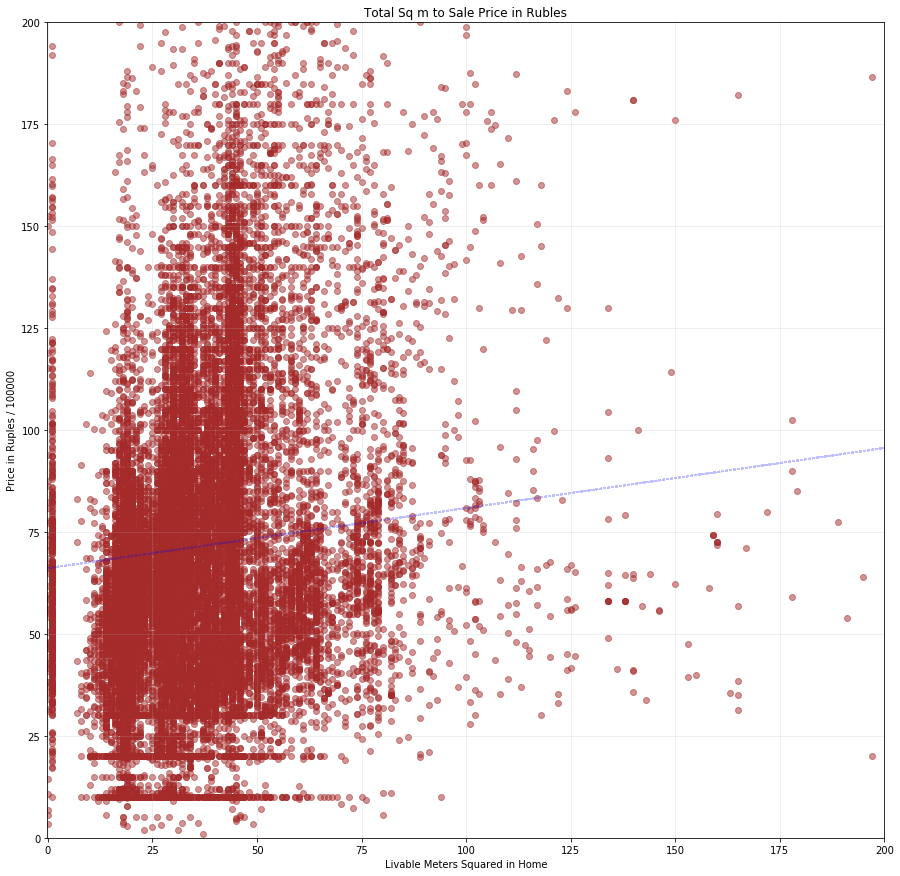

<Figure size 432x288 with 0 Axes>

In [123]:
x= complete_df["Livable Sq m"]
y = complete_df["Sale Price"]/100000
plt.figure(figsize=(15,15))
plt.xlabel("Livable Meters Squared in Home")
plt.ylabel("Price in Ruples / 100000")
plt.ylim(0,200)
plt.xlim(-.15,200)
plt.title("Total Sq m to Sale Price in Rubles")
plt.grid(alpha=.25)
plt.scatter(x, y, alpha=0.5,color="brown")
#trendline#
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b:", alpha=.25)
plt.show()
plt.savefig("livablesqm.png")

In [124]:
#liveable sqm

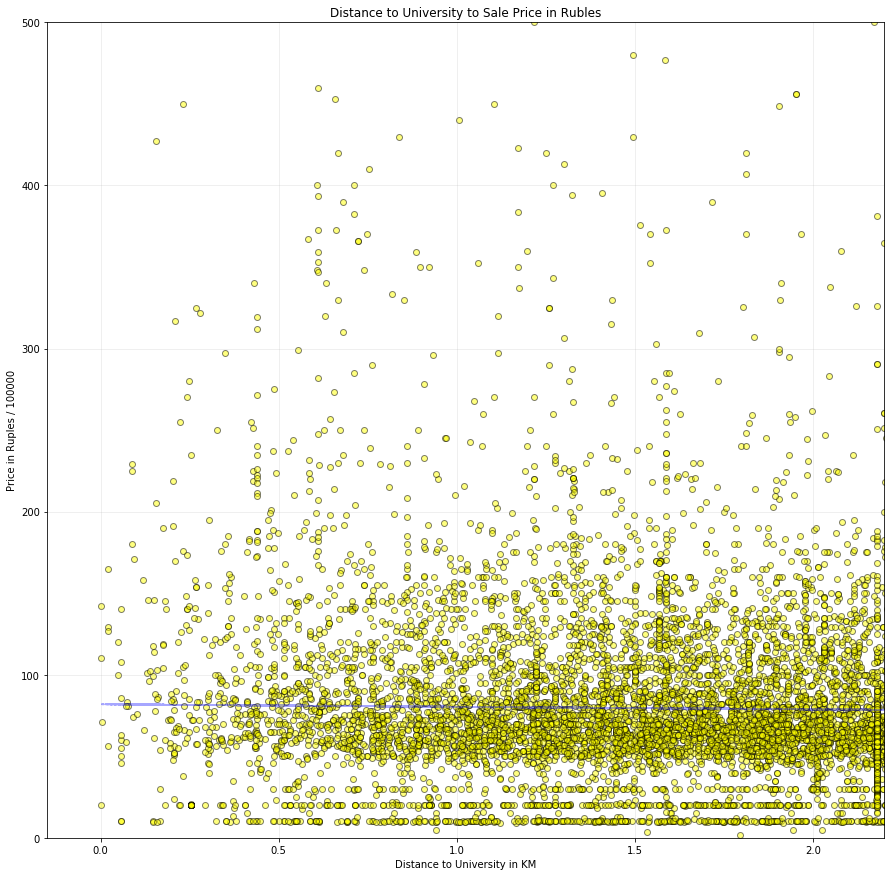

<Figure size 432x288 with 0 Axes>

In [71]:
x = complete_df["Distance to University"]
y = complete_df["Sale Price"]/100000
plt.figure(figsize=(15,15))
plt.xlabel("Distance to University in KM")
plt.ylabel("Price in Ruples / 100000")
plt.ylim(0,500)
plt.xlim(-.15,2.2)
plt.title("Distance to University to Sale Price in Rubles")
plt.grid(alpha=.25)
plt.scatter(x, y, alpha=0.5,color="yellow",edgecolor="black")
#trendline#
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b:", alpha=.35)
plt.show()
plt.savefig("pricedistuni.png")

In [69]:
#The distance to a university doesn't really effect relationship, and appears to keep a stable realtionship.

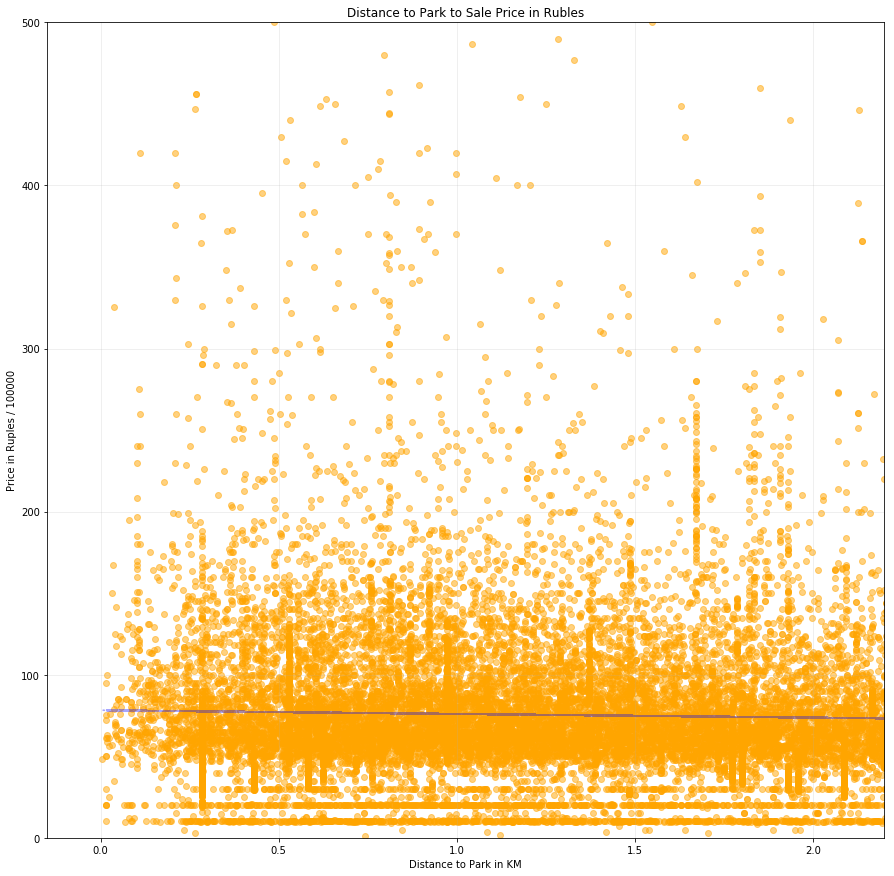

<Figure size 432x288 with 0 Axes>

In [72]:
x = complete_df["Distance to Park"]
y = complete_df["Sale Price"]/100000
plt.figure(figsize=(15,15))
plt.xlabel("Distance to Park in KM")
plt.ylabel("Price in Ruples / 100000")
plt.ylim(0,500)
plt.xlim(-.15,2.2)
plt.title("Distance to Park to Sale Price in Rubles")
plt.grid(alpha=.25)
plt.scatter(x, y, alpha=0.5,color="orange")
#trendline#
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b:", alpha=.35)
plt.show()
plt.savefig("pricedistpark.png")

In [ ]:
#The distance to a park. Appears to have the same effect as that of distance to University

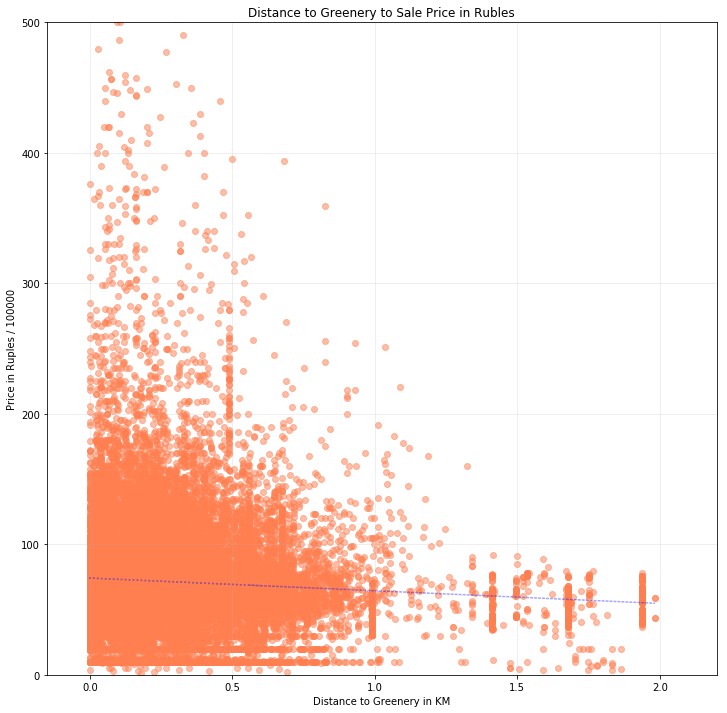

<Figure size 432x288 with 0 Axes>

In [66]:
x = complete_df["Distance to Greenery"]
y = complete_df["Sale Price"]/100000
plt.figure(figsize=(12,12))
plt.xlabel("Distance to Greenery in KM")
plt.ylabel("Price in Ruples / 100000")
plt.ylim(0,500)
plt.xlim(-.15,2.2)
plt.title("Distance to Greenery to Sale Price in Rubles")
plt.grid(alpha=.25)
plt.scatter(x, y, alpha=0.5,color="coral")
#trendline#
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b:", alpha=.35)
plt.show()
plt.savefig("pricedistgreen.png")

In [ ]:
#The further greenery gets from a home, the drop in sale price, postivie price closer to zero; negative correlation

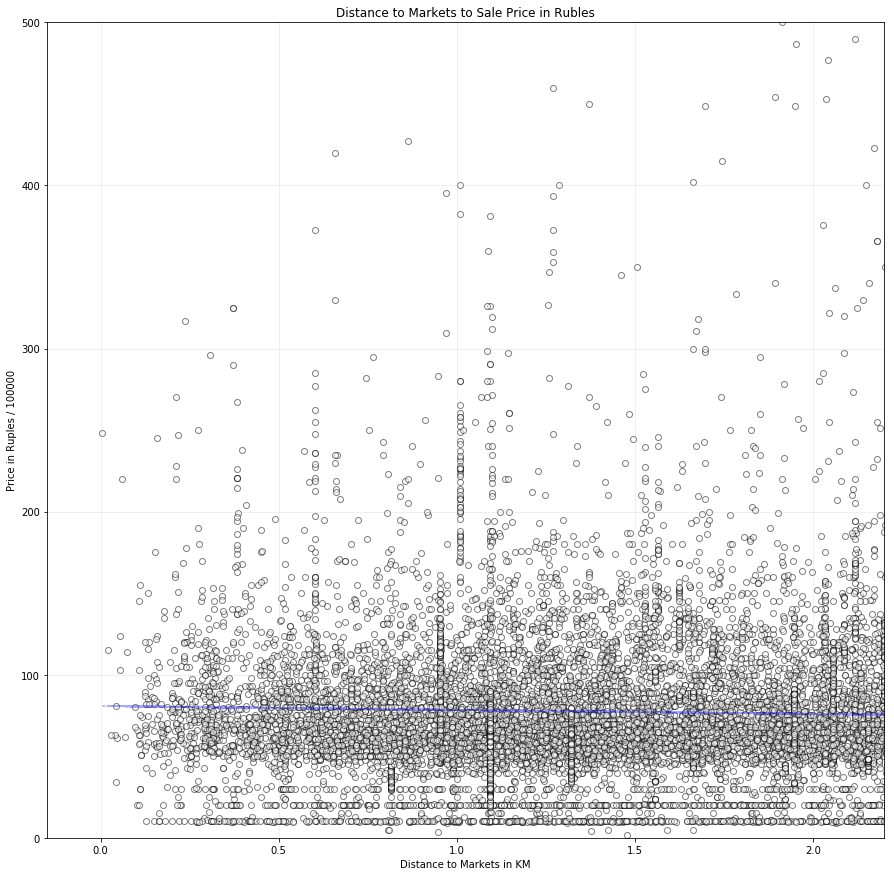

<Figure size 432x288 with 0 Axes>

In [73]:
x = complete_df["Distance to markets/shops"]
y = complete_df["Sale Price"]/100000
plt.figure(figsize=(15,15))
plt.xlabel("Distance to Markets in KM")
plt.ylabel("Price in Ruples / 100000")
plt.ylim(0,500)
plt.xlim(-.15,2.2)
plt.title("Distance to Markets to Sale Price in Rubles")
plt.grid(alpha=.25)
plt.scatter(x, y, alpha=0.5,color="white",edgecolor="black")
#trendline#
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b:", alpha=.35)
plt.show()
plt.savefig("pricedistmarkets.png")

In [74]:
#Distance to shops doesn't have a major corrleative effective, but like the last few, a minor trend can be seen
#the further we go away from items a decrease in price is noticed.

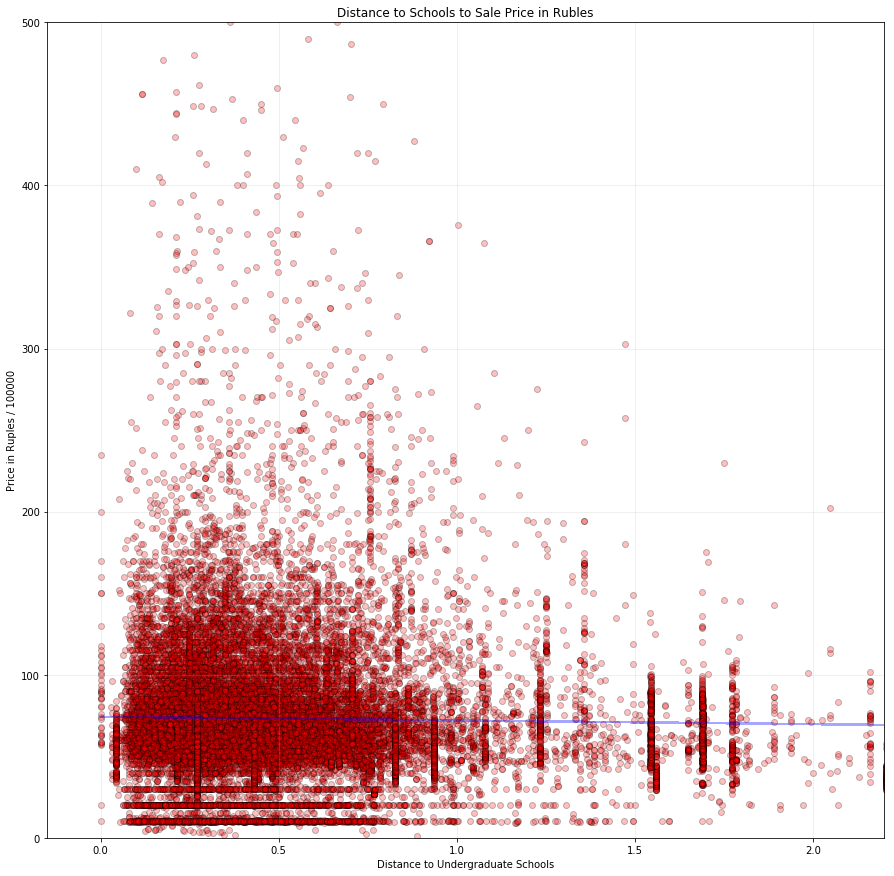

<Figure size 432x288 with 0 Axes>

In [77]:
x = complete_df["Distance to School"]
y = complete_df["Sale Price"]/100000
plt.figure(figsize=(15,15))
plt.xlabel("Distance to Undergraduate Schools")
plt.ylabel("Price in Ruples / 100000")
plt.ylim(0,500)
plt.xlim(-.15,2.2)
plt.title("Distance to Schools to Sale Price in Rubles")
plt.grid(alpha=.25)
plt.scatter(x, y, alpha=0.25,color="red",edgecolor="black")
#trendline#
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b:", alpha=.35)
plt.show()
plt.savefig("pricedistschools.png")

In [78]:
#distance from school has a noticceable trend, the further the school, less the value of a home. 

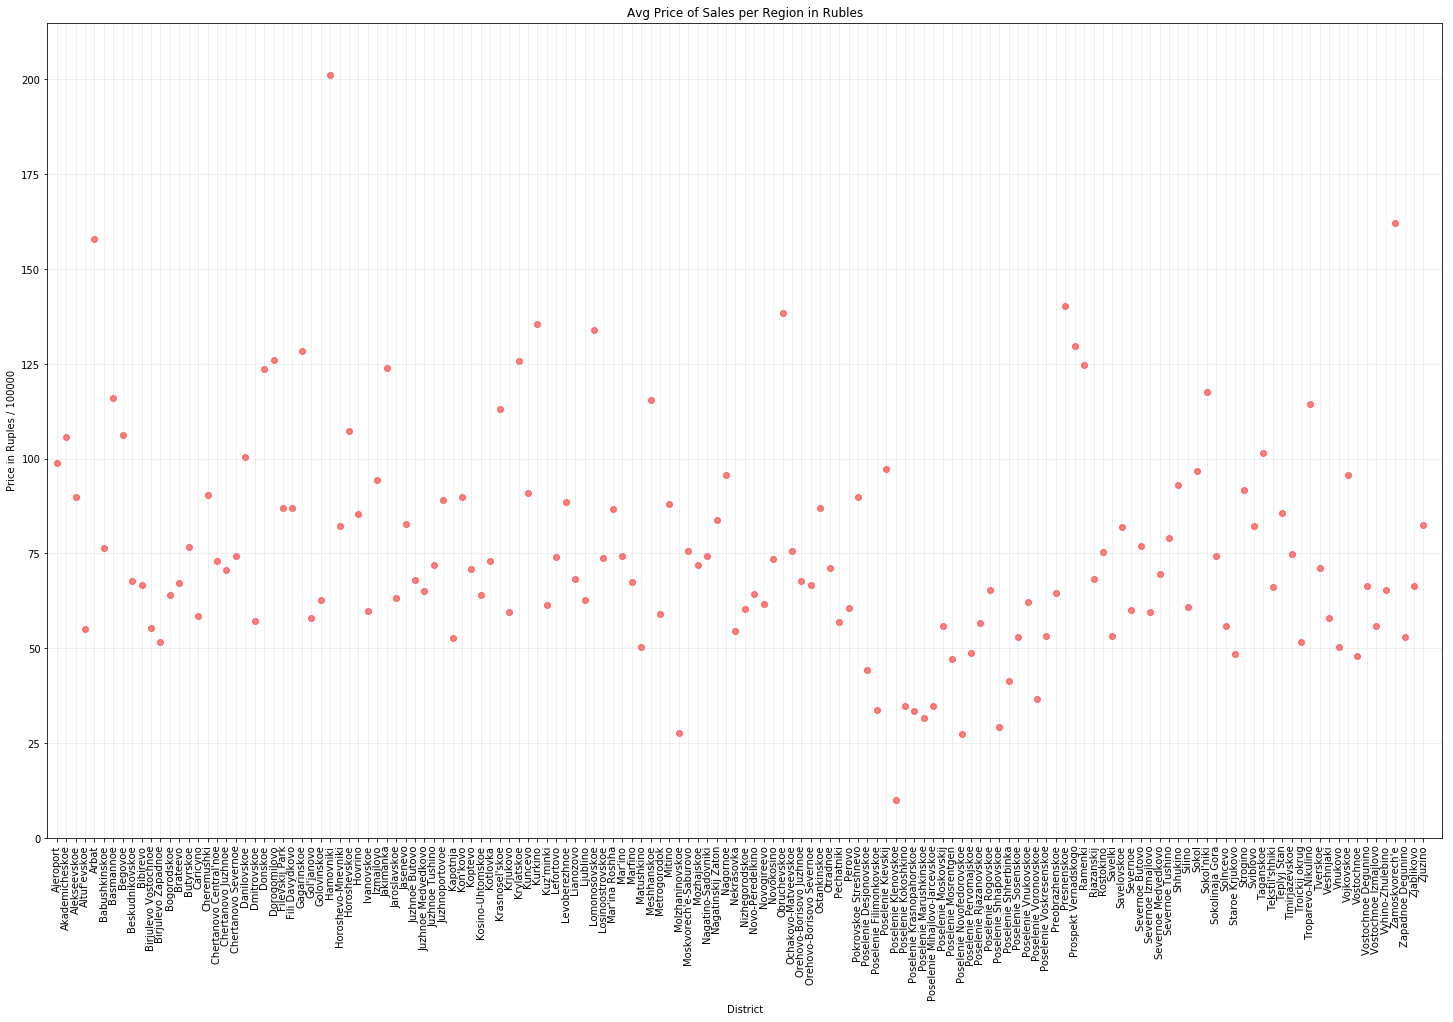

In [39]:
x= for_plot["District"]
y = for_plot["Sale Price"]/100000
plt.figure(figsize=(25,15))
plt.xticks(rotation=90)
plt.xlabel("District")
plt.ylabel("Price in Ruples / 100000")
plt.ylim(0,215)
plt.xlim(-1,147)
plt.title("Avg Price of Sales per Region in Rubles")
plt.grid(alpha=.25)
plt.scatter(x, y, alpha=0.5,color="red")
plt.savefig("avgpriceperregion.png")

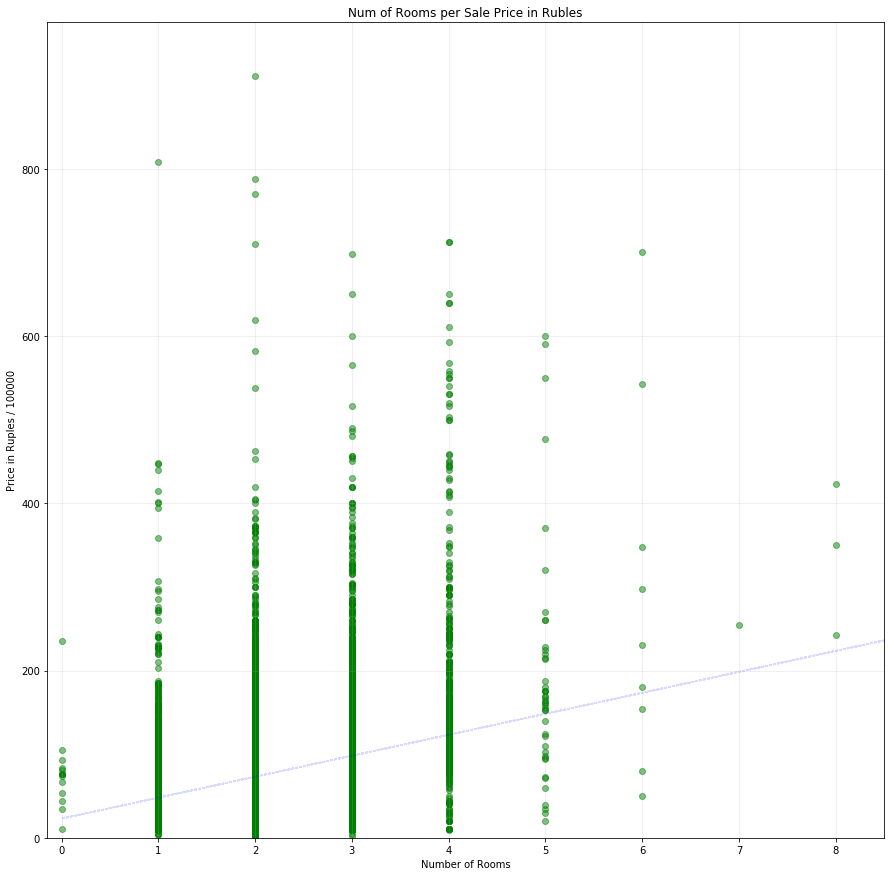

<Figure size 432x288 with 0 Axes>

In [67]:
x= complete_df["Number of Rooms"]
y = complete_df["Sale Price"]/100000
plt.figure(figsize=(15,15))
plt.xlabel("Number of Rooms")
plt.ylabel("Price in Ruples / 100000")
plt.ylim(0,975)
plt.xlim(-.15,8.5)
plt.title("Num of Rooms per Sale Price in Rubles")
plt.grid(alpha=.25)
plt.scatter(x, y, alpha=0.5,color="green")
#trendline#
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b:", alpha=.15)
plt.show()
plt.savefig("avgpriceperroom.png")

In [41]:
#We can see in the above graph that there is a noticeable trend, I don't believe the trendline graphed is accurate however.

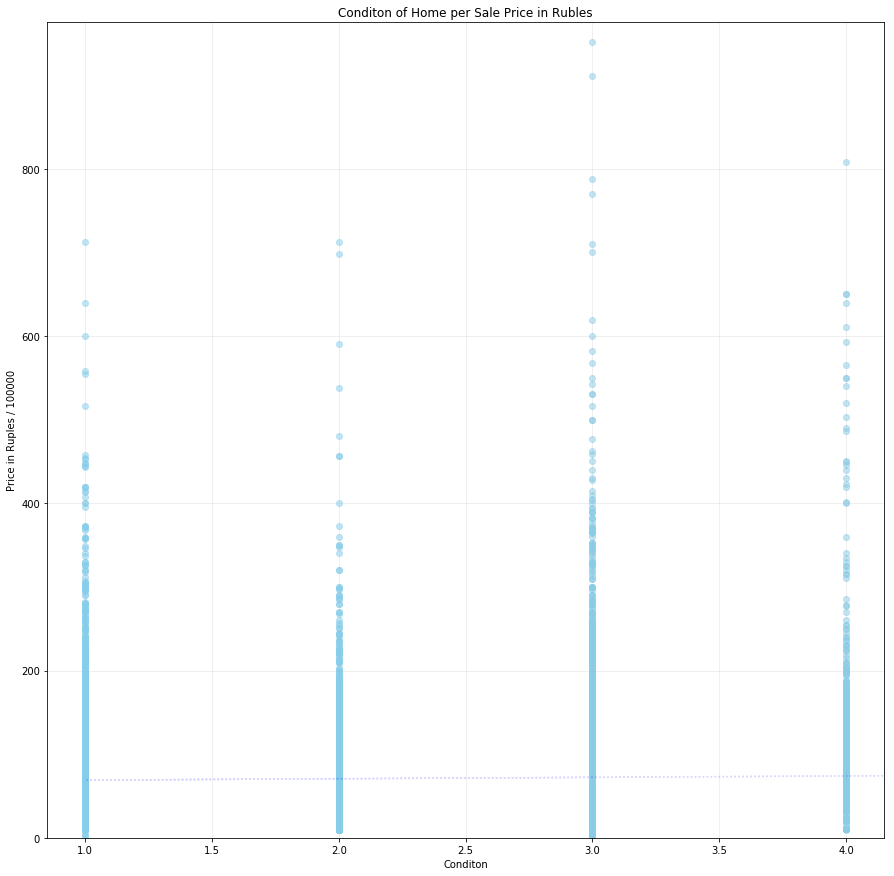

<Figure size 432x288 with 0 Axes>

In [97]:
x= complete_df["Condition"]
y = complete_df["Sale Price"]/100000
plt.figure(figsize=(15,15))
plt.xlabel("Conditon")
plt.ylabel("Price in Ruples / 100000")
plt.ylim(0,975)
plt.xlim(.85,4.15)
plt.title("Conditon of Home per Sale Price in Rubles")
plt.grid(alpha=.25)
plt.scatter(x, y, alpha=0.5,color="skyblue")
#trendline#
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b:", alpha=.15)
plt.show()
plt.savefig("conditionhome.png")

In [98]:
#condition of a home seems to not be a hugely relevant factor in relation to the price of a home. 

In [111]:
#creating what has been our target variable
target = np.log(complete_df["Sale Price"])

In [114]:
#doing one last check to make sure that my complete_df correlates with target variables to the full dataset arranged
#it appears assignments we put in the complete_df match well to the full dataset and will keep complete_df
numeric_features = train_df.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print(corr['price_doc'].sort_values(ascending=False)[:5],"\n")
print(corr['price_doc'].sort_values(ascending=False)[-5:])

price_doc           1.000000
num_room            0.476337
full_sq             0.341840
sport_count_5000    0.294864
sport_count_3000    0.290651
Name: price_doc, dtype: float64 

ttk_km               -0.272620
bulvar_ring_km       -0.279158
kremlin_km           -0.279249
sadovoe_km           -0.283622
zd_vokzaly_avto_km   -0.284069
Name: price_doc, dtype: float64


In [130]:
data = complete_df.select_dtypes(include=[np.number]).interpolate().dropna()

In [131]:
y = np.log(complete_df["Sale Price"])
X = data.drop(['Sale Price', 'Condition'], axis=1)

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)



In [135]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [136]:
model = lr.fit(X_train, y_train)

In [137]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.21255481286408862


In [138]:
predictions = model.predict(X_test)

In [139]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))



RMSE is: 
 0.2823677857303543


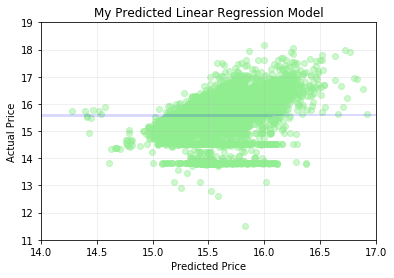

In [160]:
actual = y_test
plt.scatter(predictions, actual, alpha=.45,
            color='lightgreen') 
plt.grid(alpha=.25)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('My Predicted Linear Regression Model')
plt.xlim(14,17)
plt.ylim(11,19)
z = np.polyfit(x, y,1)
p = np.poly1d(z)
plt.plot(x,p(x),"b:", alpha=.15)
plt.savefig("final_results.png")
plt.show()